# Support Vector Machine

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

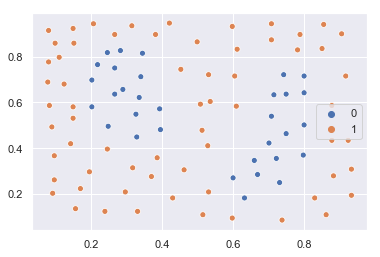

In [37]:
%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np

df = pd.read_csv('./datasets/svm.csv', header=None)

X = df.iloc[:, 0:2].values
y = df[df.columns[2]].values

ax = sns.scatterplot(X[:, 0], X[:, 1], hue=y)
plt.show()

In [42]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [103]:
model = SVC(kernel='rbf', gamma=25)
model.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=25, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

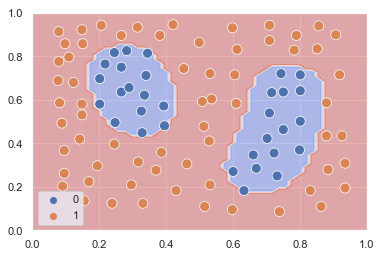

In [112]:
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
sns.scatterplot(X0, X1, hue=y, cmap=plt.cm.coolwarm, s=100, edgecolors='k')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

In [105]:
print(model.predict([ [0.2, 0.8], [0.5, 0.4] ]))
print(accuracy_score(y, model.predict(X)))
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y, model.predict(X), average='micro'))

[0 1]
0.9895833333333334
(0.9895833333333334, 0.9895833333333334, 0.9895833333333334, None)
